<a href="https://colab.research.google.com/github/UserYoshi/Detector_Billetes/blob/main/Detector_de_billetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dectector de billetes**

# ***Librerias***


***# Instalar Librerias necesarias:***

In [ ]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

# ***Descarga del dataset***

In [ ]:

from roboflow import Roboflow

rf = Roboflow(api_key="lt3WoTZ25WrjbIc2PcsJ")
project = rf.workspace("billetes-y5vbu").project("billetes-7i64h")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to billetes-3 in yolov11:: 100%|██████████| 1884/1884 [00:00<00:00, 8239.48it/s]


# ***Cargar el modelo base YOLOv11***

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11s.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 187MB/s]


# ***Entrenamiento del modelo personalizado***

In [ ]:
data_path = "/content/billetes-3/data.yaml"
results = model.train(data=data_path, epochs=35, imgsz=640)

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/billetes-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=35, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 13                  -1  1    443776  ultralytics.nn.modules.block.C3k2            [768, 256, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    127680  ultralytics.nn.modules.block.C3k2            [512, 128, 1, False]          
 17                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1    345472  ultralytics.nn.modules.block.C3k2            [384, 256, 1, False]          
 20                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 38.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 790.4±461.4 MB/s, size: 36.4 KB)


train: Scanning /content/billetes-3/train/labels... 655 images, 0 backgrounds, 0 corrupt: 100%|██████████| 655/655 [00:00<00:00, 2213.77it/s]


train: New cache created: /content/billetes-3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 826. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 685.8±399.5 MB/s, size: 37.3 KB)


val: Scanning /content/billetes-3/valid/labels... 188 images, 0 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<00:00, 1537.08it/s]

val: New cache created: /content/billetes-3/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 159, len(boxes) = 239. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      3.97G      0.941      3.205      1.349         42        640: 100%|██████████| 41/41 [00:15<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        188        239      0.372      0.486      0.376      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      4.77G     0.8478      1.669      1.229         28        640: 100%|██████████| 41/41 [00:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]

                   all        188        239      0.368      0.378      0.287      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      4.81G      0.861      1.314      1.212         61        640: 100%|██████████| 41/41 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        188        239      0.602      0.421      0.471      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      4.85G     0.8449      1.156      1.212         38        640: 100%|██████████| 41/41 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        188        239      0.417      0.392      0.291      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      4.89G     0.8465      1.134      1.212         32        640: 100%|██████████| 41/41 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        188        239      0.585      0.643      0.669      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      4.93G     0.8029       1.04      1.185         51        640: 100%|██████████| 41/41 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        188        239      0.615      0.646      0.737      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      4.97G     0.8031     0.9944      1.177         47        640: 100%|██████████| 41/41 [00:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        188        239       0.75      0.774      0.879      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      5.01G     0.7967      0.914      1.173         34        640: 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        188        239      0.657      0.584      0.584      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      5.05G     0.7675     0.8687      1.161         33        640: 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]

                   all        188        239      0.684       0.66      0.777      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      5.09G     0.7209     0.8132      1.142         43        640: 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        188        239      0.819      0.861      0.943      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      5.13G     0.7076      0.799      1.115         27        640: 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        188        239       0.85       0.85      0.928      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      5.17G     0.7318     0.8062       1.13         44        640: 100%|██████████| 41/41 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        188        239      0.943      0.914      0.966       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      5.21G     0.7164     0.7309      1.134         29        640: 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        188        239      0.851      0.846      0.922      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      5.25G     0.7018     0.7284      1.121         31        640: 100%|██████████| 41/41 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        188        239      0.912      0.862      0.951      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      5.29G     0.6844      0.713      1.107         46        640: 100%|██████████| 41/41 [00:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        188        239        0.8      0.879      0.943      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      5.33G     0.6595     0.6695        1.1         32        640: 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        188        239      0.894       0.79      0.928      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      5.37G     0.6376     0.6435      1.081         39        640: 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        188        239      0.933      0.934      0.969      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      5.41G     0.6351     0.6178      1.075         33        640: 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        188        239       0.92      0.913       0.97       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      5.45G     0.6653     0.6867      1.092         29        640: 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        188        239      0.919      0.917      0.973      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      5.49G     0.6317     0.6395      1.083         53        640: 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        188        239      0.936       0.96      0.975      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      5.53G     0.6096     0.5957      1.067         33        640: 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        188        239       0.95      0.937       0.98      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      5.57G     0.6088     0.5861       1.06         43        640: 100%|██████████| 41/41 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        188        239      0.964      0.983       0.99      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      5.61G     0.5856     0.5469      1.047         44        640: 100%|██████████| 41/41 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        188        239      0.982      0.944      0.984      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      5.64G     0.6081     0.5553      1.073         35        640: 100%|██████████| 41/41 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        188        239      0.946      0.961      0.989       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      5.69G     0.5892     0.5202      1.056         34        640: 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        188        239      0.961      0.978      0.985      0.895


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      5.73G     0.4295     0.3994     0.9809         16        640: 100%|██████████| 41/41 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        188        239      0.956      0.946      0.984      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      5.77G     0.4277     0.3723     0.9673         15        640: 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        188        239      0.957      0.972      0.977      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35       5.8G     0.4196     0.3295      0.969         16        640: 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        188        239      0.971      0.981       0.98      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      5.85G     0.4066     0.3209     0.9624         16        640: 100%|██████████| 41/41 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        188        239      0.968      0.963      0.983      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      5.88G       0.39     0.3304     0.9423         24        640: 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all        188        239      0.955       0.97      0.986      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      5.92G      0.376     0.2878     0.9347         20        640: 100%|██████████| 41/41 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all        188        239      0.975      0.983      0.987      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      5.96G     0.3692      0.287     0.9236         23        640: 100%|██████████| 41/41 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        188        239      0.978      0.983      0.991      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35         6G     0.3588      0.284     0.9146         19        640: 100%|██████████| 41/41 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        188        239      0.979      0.986      0.991      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      6.04G     0.3506     0.2729      0.917         21        640: 100%|██████████| 41/41 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        188        239      0.976      0.992      0.991      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      6.08G     0.3432      0.261     0.9236         19        640: 100%|██████████| 41/41 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        188        239      0.982      0.982      0.991      0.925



35 epochs completed in 0.151 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 19.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]


                   all        188        239      0.976      0.992      0.991      0.926
                  1000         46         46      0.975          1      0.995       0.92
                 10000         28         28      0.989          1      0.995      0.948
                100000          7          7      0.959          1      0.995      0.943
                  2000         35         38      0.949      0.972      0.987      0.895
                 20000         38         38      0.994          1      0.995       0.93
                  5000         45         45          1      0.973      0.993      0.932
                 50000         37         37      0.969          1      0.979      0.912
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train3


# ***Predicciones***

In [8]:
# Cargamos el modelo ya entrenado
custom_model = YOLO("/content/runs/detect/train3/weights/best.pt")

In [9]:
# Realizamos predicciones sobre algunas imágenes
res = custom_model("/content/billetes-3/test/images")


image 1/93 /content/billetes-3/test/images/IMG_20250530_133352_jpg.rf.655ae9a17b9ddd21c30fa2e184de99db.jpg: 640x640 1 100000, 15.6ms
image 2/93 /content/billetes-3/test/images/IMG_20250530_133537_jpg.rf.e346f286faa630d16f6872bc4b1df93c.jpg: 640x640 1 100000, 15.6ms
image 3/93 /content/billetes-3/test/images/IMG_20250601_182552_jpg.rf.09277a9914ed348020c09739c9a6c352.jpg: 640x640 1 5000, 15.6ms
image 4/93 /content/billetes-3/test/images/IMG_20250601_182734_jpg.rf.e1ab3bd0205342738957492bcbd490fe.jpg: 640x640 1 5000, 15.6ms
image 5/93 /content/billetes-3/test/images/IMG_20250603_194316_jpg.rf.02fa727e80daffec5121709ff76862ef.jpg: 640x640 1 50000, 15.2ms
image 6/93 /content/billetes-3/test/images/IMG_20250603_194324_jpg.rf.cb930819a2b19dd53047612e7b16b8ac.jpg: 640x640 1 50000, 14.6ms
image 7/93 /content/billetes-3/test/images/IMG_20250603_194350_jpg.rf.af6114fd34d228d6172fe17dff52a2b6.jpg: 640x640 1 50000, 14.6ms
image 8/93 /content/billetes-3/test/images/IMG_20250603_194529_jpg.rf.bbc2f

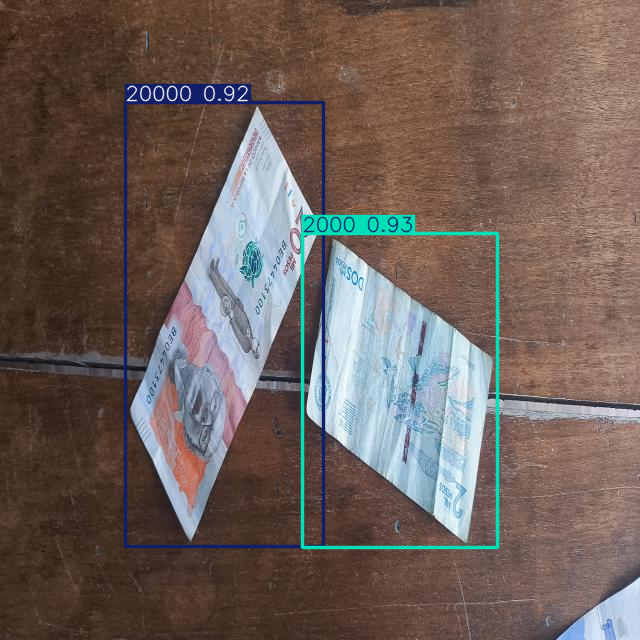

In [11]:
res[78].show()